# Preparación Data Final para Modelar

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sys
import matplotlib
sns.set_style('darkgrid')
plt.style.use('ggplot')


# Manejo de fechas
import datetime
import matplotlib.dates as mdates
from datetime import date
from dateutil.relativedelta import relativedelta
from sklearn import metrics

pd.set_option('display.max_columns', None)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#from sklearn.externals import joblib
from sklearn.utils import resample

from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

## Datos

In [2]:
#test

In [3]:
df1= pd.read_csv('../sintetic_ds.csv', sep=",")
df2= pd.read_csv('../sintetic_ds2.csv', sep=",")
df3= pd.read_excel('../real_dataset.xlsx')

df3.rename(columns ={'Materia orgánica': 'SOC', 'pH': 'PH', 'Densidad':'NrTrees'}, inplace=True)

df3['N_supply'] = df3['Nitratos'] + df3['Amonio']

df = pd.concat([df1,df2] , ignore_index=True)

#df= pd.read_csv('./sintetic_ds.csv', sep=";", header=None, names=header_list)
df.head()


,PH,TEMP,SOC,KEX,PBRAY,N_base_supply,P_base_supply,K_base_supply,N_recovery,P_recovery,K_recovery,NrTrees,crop,NminStore,NminVeg,NmaxStore,NmaxVeg,PminStore,PminVeg,PmaxStore,PmaxVeg,KminStore,KminVeg,KmaxStore,KmaxVeg,Unnamed: 25,N,P,K,No,Po,Ko,leaf_att,stem_att,store_att,SeasonLength,leaf_lim,stem_lim,store_lim,N_supply,P_supply,K_supply,N_uptake,P_uptake,K_uptake,N_gap,P_gap,K_gap
0,4.7,21,30,1.5,1.1,63.8,1.7,21.2,0.7,0.17,0.7,3810,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,6779.22444,230,130,130,0,0,0,3264.08034,3515.1441,3713.394876,240,3264.1,3515.1,3152.1,212.1,22.5,105.8,195.8,22.0,97.8,159.3,10.7,0.0
1,5.7,21,20,1.7,1.1,67.5,5.3,29.2,0.7,0.17,0.7,5210,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,9270.27804,200,50,310,0,0,0,4463.47994,4806.7981,4262.349226,240,4463.5,4806.8,2881.2,207.1,13.8,245.8,175.7,13.7,138.4,331.8,112.6,0.0
2,5.1,21,21,1.5,1.1,55.1,3.7,28.0,0.7,0.17,0.7,3090,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,5498.11116,550,80,310,0,0,0,2647.24626,2850.8649,3386.065776,240,2647.2,2850.9,3185.0,375.9,14.8,209.2,265.1,14.8,139.2,0.0,29.6,0.0
3,5.9,21,25,0.3,1.1,90.6,6.8,3.9,0.7,0.17,0.7,4050,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,7206.26220,460,130,80,0,0,0,3469.69170,3736.5705,3815.710656,240,3469.7,3736.6,3285.6,397.7,27.9,57.7,292.9,25.2,57.0,0.0,0.0,0.0
4,5.3,21,10,1.1,1.1,28.8,2.4,41.4,0.7,0.17,0.7,6300,Coffee,0.0028,0.0454,0.0048,0.0459,0.00038,0.0038,0.00028,0.003,0.0045,0.003,0.0064,0.004,11209.74120,280,40,50,0,0,0,5397.29820,5812.4430,4609.717375,240,5397.3,5812.4,1784.7,209.6,8.6,71.2,150.7,8.6,58.9,456.6,182.7,0.0


In [4]:
df3.head()

,Manejo,Nitratos,Amonio,Humedad,PH,SOC,NrTrees,Fertilizante,N,P,K,N_supply
0,1,92.23,0.496,15.48,5.00,4.885,3791,303280,130.56,64,76.8,92.726
1,1,91.06,0.402,15.48,5.06,4.882,4687,374960,130.56,64,76.8,91.462
2,1,90.48,0.440,17.91,5.02,4.888,2719,217520,130.56,64,76.8,90.920
3,1,185.04,0.274,16.04,4.59,3.826,4904,392320,130.56,64,76.8,185.314
4,1,216.98,0.120,14.64,4.66,3.824,4404,352320,130.56,64,76.8,217.100


In [5]:
df3.dropna(subset=['N_supply'], inplace=True)
df3.count()


Manejo          124
Nitratos        124
Amonio          124
Humedad         124
PH              124
SOC             124
NrTrees         124
Fertilizante    124
N               124
P               124
K               124
N_supply        124
dtype: int64

In [6]:
TO_KEEP=['PH', 'SOC', 'NrTrees', 'N', 'P', 'K','N_supply']
df = df[TO_KEEP]
df
df3 = df3[TO_KEEP]


In [7]:
df.count()

PH          15000
SOC         15000
NrTrees     15000
N           15000
P           15000
K           15000
N_supply    15000
dtype: int64

## Escogiendo columnas relevantes

In [8]:
df.value_counts()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PH        15000 non-null  float64
 1   SOC       15000 non-null  int64  
 2   NrTrees   15000 non-null  int64  
 3   N         15000 non-null  int64  
 4   P         15000 non-null  int64  
 5   K         15000 non-null  int64  
 6   N_supply  15000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 820.4 KB


In [9]:
y = df['N_supply']
#x= df
X = df.drop('N_supply', axis=1)
X.info()


ytest_new_dataset=df3['N_supply']
Xtest_new_dataset=df3.drop('N_supply', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 0)



X_test = Xtest_new_dataset

y_test = ytest_new_dataset


from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PH       15000 non-null  float64
 1   SOC      15000 non-null  int64  
 2   NrTrees  15000 non-null  int64  
 3   N        15000 non-null  int64  
 4   P        15000 non-null  int64  
 5   K        15000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 703.2 KB


## RandomForestRegressor

In [10]:
print("\n")
print('\033[1m' + "N_supply Random Forest")
print('\033[0m')

#X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
regr.get_params()

#
#print("Puntaje Random Forest Regressor: " + str(regr.oob_score_))
pred =  regr.predict(X_test)
gt = y_test


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))





N_supply Random Forest

Mean Absolute Error (MAE): 110.71830532744326
Mean Squared Error (MSE): 13568.117797127428
Root Mean Squared Error (RMSE): 116.48226387363627
Mean Absolute Percentage Error (MAPE): 180.5
Accuracy: -80.5
R^2: -3.1920631489318945


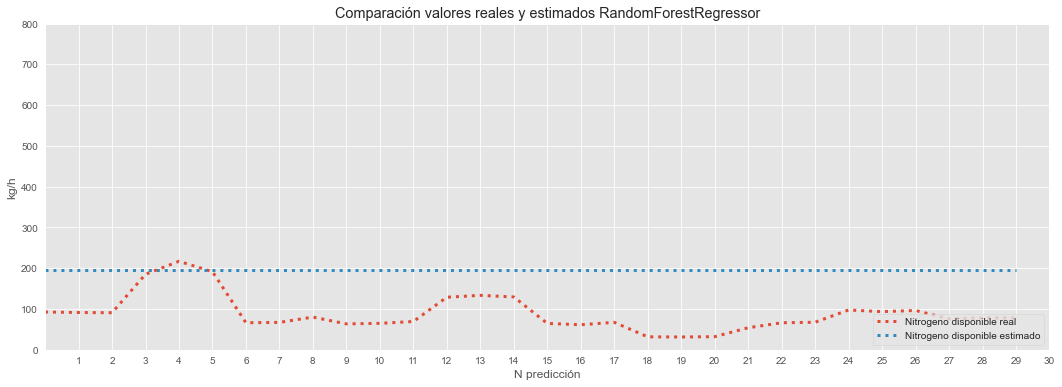

In [11]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados RandomForestRegressor')
plt.legend(loc='lower right')
plt.show()



In [12]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

## Multi-layer Perceptron (MLP)

In [13]:

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred = regr.predict(X_test)



print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)




Mean Absolute Error (MAE): 35.429099082473904
Mean Squared Error (MSE): 3152.373926977317
Root Mean Squared Error (RMSE): 56.14600544096897
Mean Absolute Percentage Error (MAPE): 42.35
Accuracy: 57.65
R^2: 0.026029198115221752


0.026029198115221752

In [14]:
#print(regr.predict([[4.7, 30, 1.5, 1.1, 3810, 230, 130, 130, 3713.394876]]))

In [15]:
X_test.head()


,PH,SOC,NrTrees,N,P,K
0,5.00,4.885,3791,130.56,64,76.8
1,5.06,4.882,4687,130.56,64,76.8
2,5.02,4.888,2719,130.56,64,76.8
3,4.59,3.826,4904,130.56,64,76.8
4,4.66,3.824,4404,130.56,64,76.8


In [16]:
y_test.head()

0     92.726
1     91.462
2     90.920
3    185.314
4    217.100
Name: N_supply, dtype: float64

In [17]:
#print(regr.predict([[5.1, 21, 1.5, 1.1, 3090, 550, 80, 310, 3386.065776]]))

In [18]:
#print(regr.predict([[5.5, 13, 0.9, 1.1, 4950, 410, 120, 180, 4169.140656]]))

In [19]:
X_test[0:1]

,PH,SOC,NrTrees,N,P,K
0,5.0,4.885,3791,130.56,64,76.8


In [20]:
display(X_test.iloc[0])

PH            5.000
SOC           4.885
NrTrees    3791.000
N           130.560
P            64.000
K            76.800
Name: 0, dtype: float64

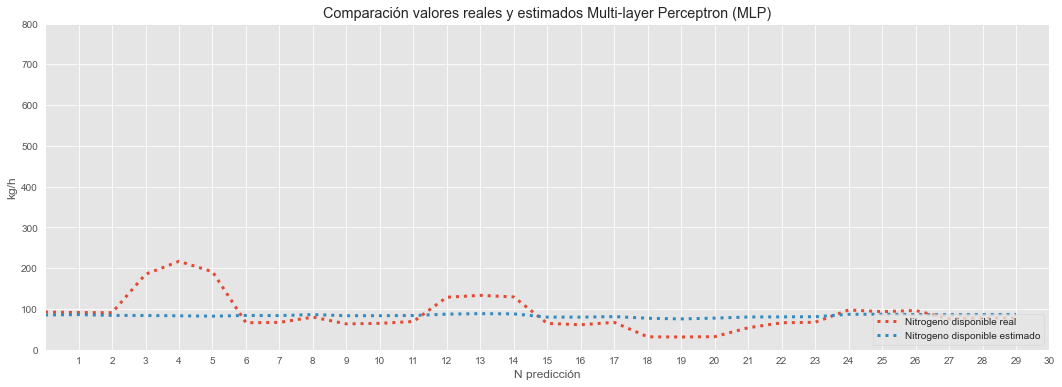

In [21]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados Multi-layer Perceptron (MLP)')
plt.legend(loc='lower right')
plt.show()




In [22]:
gt[:muestras]


0      92.726
1      91.462
2      90.920
3     185.314
4     217.100
5     191.622
6      66.332
7      67.220
8      80.201
9      63.578
10     64.912
11     69.382
12    128.992
13    133.559
14    129.616
15     64.711
16     61.451
17     67.348
18     31.800
19     31.434
20     32.178
21     54.072
22     66.322
23     67.543
24     97.647
25     93.613
26     96.428
27     75.775
28     78.246
29     77.991
Name: N_supply, dtype: float64

##  BaggingRegressor

In [23]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [24]:


pred = regr.predict(X_test)


print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)



Mean Absolute Error (MAE): 186.9708902889159
Mean Squared Error (MSE): 37656.53648429932
Root Mean Squared Error (RMSE): 194.0529218648854
Mean Absolute Percentage Error (MAPE): 294.73
Accuracy: -194.73
R^2: -10.634523024679341


-10.634523024679341

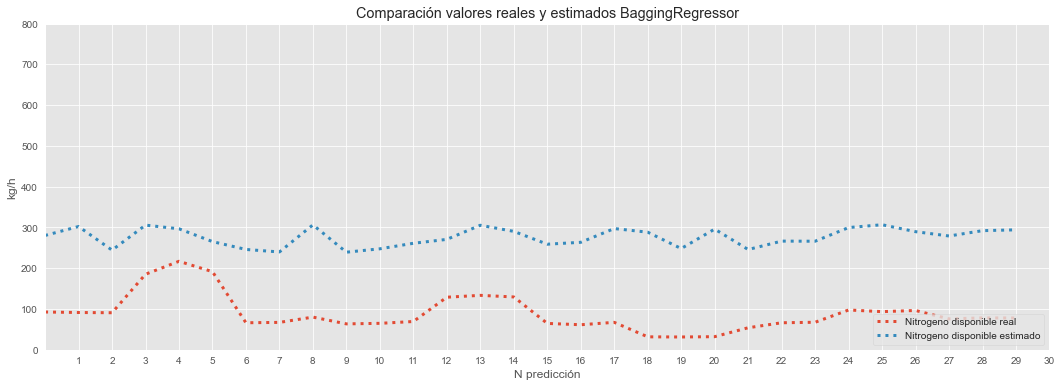

In [25]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados BaggingRegressor')
plt.legend(loc='lower right')
plt.show()



## DecisionTreeRegressor

In [26]:
regressor = DecisionTreeRegressor(random_state=0)
regr = regressor.fit(X_train, y_train)

pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)

#cross_val_score(regressor, X_train, y_train, cv=20)

Mean Absolute Error (MAE): 54.18641935483871
Mean Squared Error (MSE): 4302.5857252580645
Root Mean Squared Error (RMSE): 65.59409825020894
Mean Absolute Percentage Error (MAPE): 87.87
Accuracy: 12.13
R^2: -0.3293451113604997


-0.3293451113604997

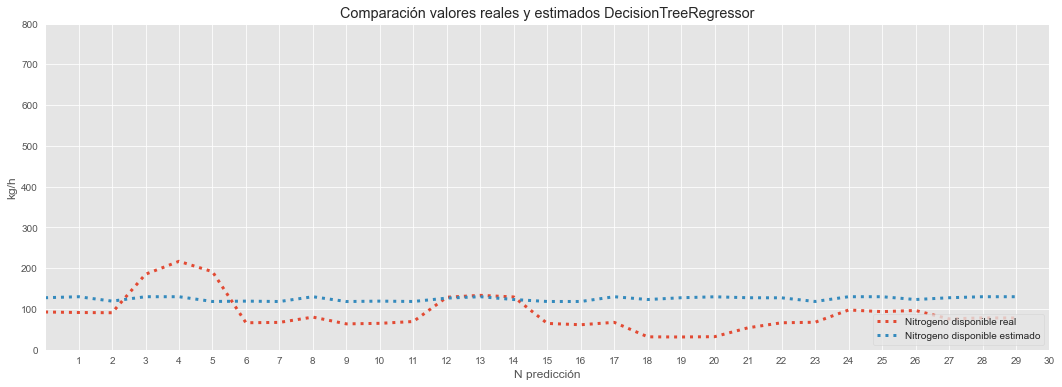

In [27]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados DecisionTreeRegressor')
plt.legend(loc='lower right')
plt.show()




## SVR


In [28]:
regr = SVR(C=100, epsilon=0.2)
regr.fit(X_train, y_train)

SVR(C=100, epsilon=0.2)

In [29]:
pred = regr.predict(X_test)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))
print('R^2:', metrics.r2_score(gt, pred))

regr.score(X_test, y_test)


Mean Absolute Error (MAE): 55.916425064295744
Mean Squared Error (MSE): 4450.436822118402
Root Mean Squared Error (RMSE): 66.7115943604888
Mean Absolute Percentage Error (MAPE): 90.43
Accuracy: 9.57
R^2: -0.3750258125413668


-0.3750258125413668

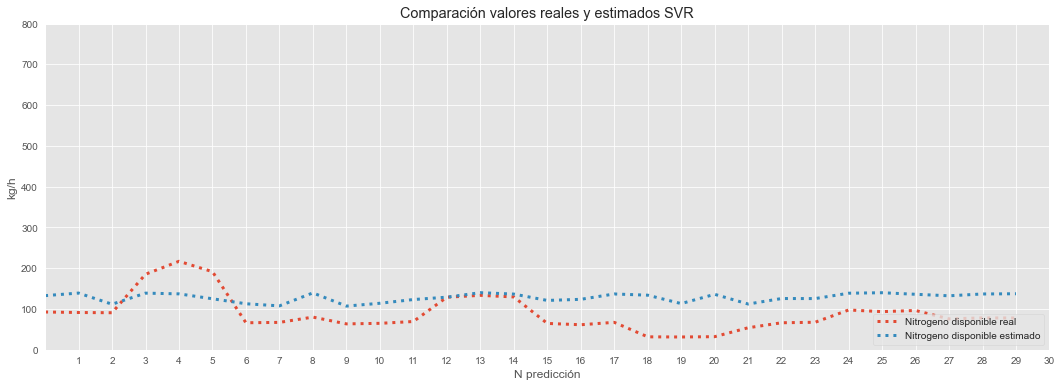

In [30]:
muestras = 30
lw = 3

y_points = np.array(gt[:muestras])
p_points = np.array(pred[:muestras])
plt.rcParams["figure.figsize"] = (18, 6)
plt.plot(y_points, ls = ':', label='Nitrogeno disponible real', lw=lw)
plt.plot(p_points, ls = ':', label='Nitrogeno disponible estimado', lw=lw)
lst = list(range(1,muestras+1))
plt.xticks(lst)
plt.xlim([0, muestras])
plt.ylim([0, 800])
plt.xlabel('N predicción')
plt.ylabel('kg/h')
plt.title('Comparación valores reales y estimados SVR')
plt.legend(loc='lower right')
plt.show()
